In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [143]:
plt.rcParams['figure.dpi'] = 150

## Steady state solver with squeezing

In [144]:
gamma = 1
eps_d = 0.5
eps_sq = -0.1
N = 20
delta = np.linspace(-2,2,100)

def do_freq_sweep():
    rho = []
    for d in delta:
        rho.append(do_calc(d))
    return rho

def do_calc(d):
    global a
    a = destroy(N)
    c = np.sqrt(gamma) * a
    H = d * a.dag() * a + eps_d*(a+a.dag())
    H += (eps_sq*a*a + np.conj(eps_sq)*a.dag()*a.dag())
    return steadystate(H, [c])
    

0.0 0.5 1.0 1.5 

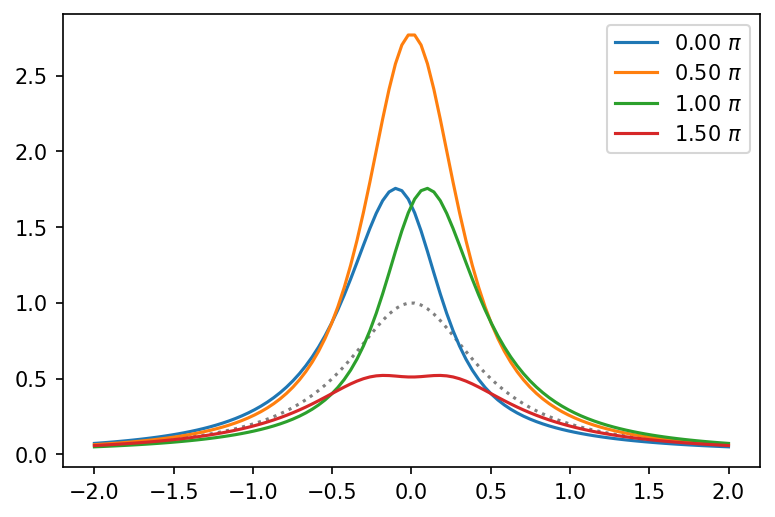

In [145]:
eps_sq = 0
a = destroy(N)
a0 = expect(a,do_freq_sweep())
plt.plot(delta, np.abs(a0)**2, ls=":", c="grey")

for th in np.arange(0,2*np.pi,np.pi/2):
    print(th/np.pi, end=" ")
    eps_sq = 0.1*np.exp(1j*th)
    r = do_freq_sweep()
    plt.plot(delta, np.abs(expect(a,r))**2, label="%.2f $\pi$" % (th/np.pi))
plt.legend()
plt.show()

That's looking a lot like a parametric amplifier! 

Let's check the Wigner functions, we should be seeing squeezing:

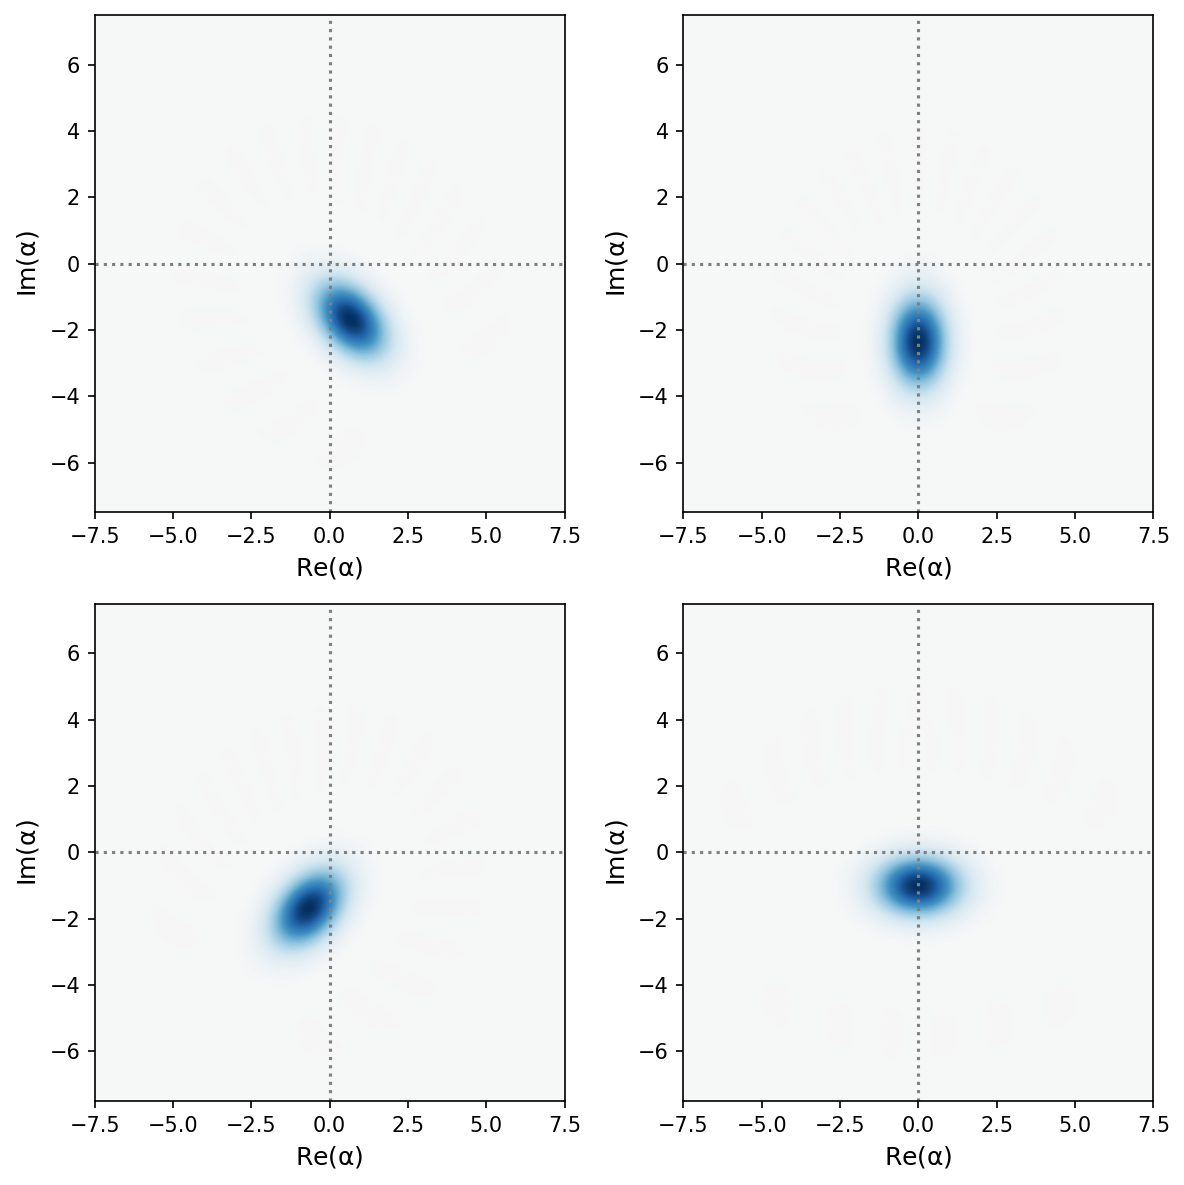

In [146]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
for th,ax in zip(np.arange(0,2*np.pi,np.pi/2), axes.flatten()):
    eps_sq = 0.1*np.exp(1j*th)
    plot_wigner(do_calc(0), fig=fig,ax=ax)
    ax.axhline(0,ls=":",c='grey')
    ax.axvline(0,ls=":",c='grey')
    ax.set_title("")
plt.tight_layout()
plt.show()

Try doing a phase sweep of the pump:

Text(0, 0.5, 'Resonant amplitude')

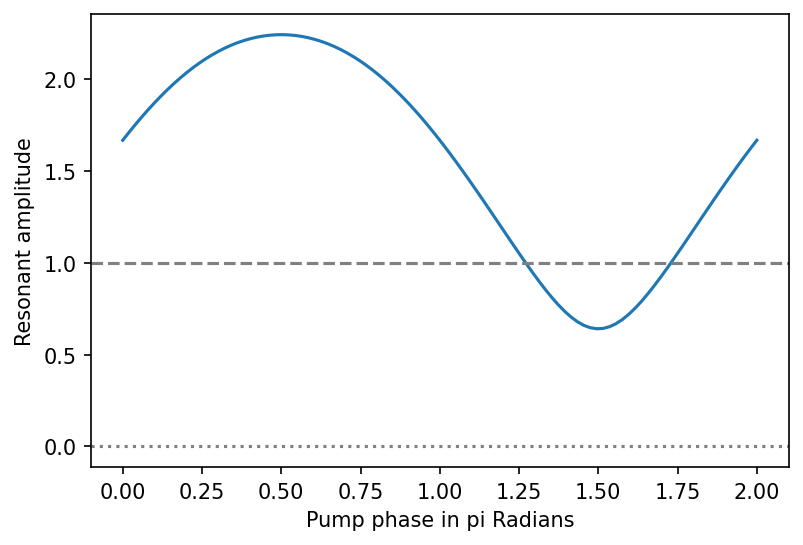

In [147]:
a_list = []
N=20
a = destroy(N)
phase = np.linspace(0,2*np.pi,100)
for th in phase:
    eps_sq = 0.14*np.exp(1j*th)
    a_list.append(expect(a,do_calc(0)))
a_list = np.array(a_list)
plt.plot(phase/np.pi, np.abs(a_list))
plt.axhline(1,ls="--",c='grey')
plt.axhline(0,ls=":",c='grey')
plt.xlabel("Pump phase in pi Radians")
plt.ylabel("Resonant amplitude")

And now sweep the pump strength:

........................................................................................................................................................................................................

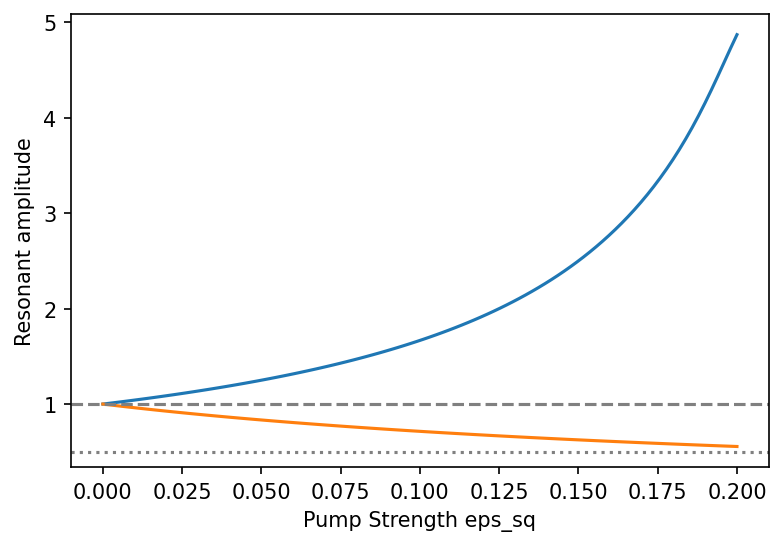

In [148]:
a_list = []
eps = np.linspace(0,0.2,100)
N = 60
a = destroy(N)

th = 0.5*np.pi
for e in eps:
    print(".", end="")
    eps_sq = e*np.exp(1j*th)
    a_list.append(expect(a,do_calc(0)))
a_list = np.array(a_list)
plt.plot(eps, np.abs(a_list), label="%.2f $\pi$" % (th/np.pi))

a_list = []
th = 1.5*np.pi
for e in eps:
    print(".", end="")
    eps_sq = e*np.exp(1j*th)
    a_list.append(expect(a,do_calc(0)))
a_list = np.array(a_list)
plt.plot(eps, np.abs(a_list), label="%.2f $\pi$" % (th/np.pi))

plt.axhline(1,ls="--", c='grey')
plt.axhline(0.5,ls=":", c='grey')

plt.xlabel("Pump Strength eps_sq")
plt.ylabel("Resonant amplitude")
plt.show()